In [1]:
# Loading the required modules
import json
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Abdo\miniconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def load_data(url):
    """
    Load data from a given URL using BeautifulSoup.

    Parameters:
    - url (str): The URL to fetch data from.

    Returns:
    - soup (BeautifulSoup): Parsed HTML content.
    """
    # Send a GET request to the URL
    response = requests.get(url)

    # Parse the HTML content of the page using BeautifulSoup
    soup = BeautifulSoup(response.text, "html.parser")

    return soup

In [3]:
def extract_and_load_data(script_element, data_type):
    if script_element:
        # Extract the JSON data using a regular expression
        script_text = script_element.text
        match = re.search(f"var {data_type}\s+=\s+JSON\.parse\('(.+?)'\)", script_text)

        if match:
            json_data_encoded = match.group(1)

            try:
                # Decode the encoded JSON data
                json_data = json.loads(json_data_encoded.encode('utf').decode('unicode_escape'))

                # Create a DataFrame from the JSON data
                df_data = pd.DataFrame(json_data)

                print(f"Successfully loaded {data_type} data into DataFrame.")
                return df_data
            except Exception as e:
                print(f"Error decoding JSON data: {str(e)}")
                return None
        else:
            print(f"JSON data not found in the {data_type} script.")
            return None
    else:
        print(f"{data_type} script element not found on the page.")
        return None

In [4]:
# URLs for the two years
url_2022 = "https://understat.com/team/Barcelona/2022"
url_2023 = "https://understat.com/team/Barcelona/2023"

In [5]:
# Load the data for 2022 into the dataframes
soup_2022 = load_data(url_2022)
df_games_data_2022 = extract_and_load_data(soup_2022.find("script", string=re.compile(r"var datesData\s+=\s+JSON\.parse\(")), "datesData")
df_statistics_data_2022 = extract_and_load_data(soup_2022.find("script", string=re.compile(r"var statisticsData\s+=\s+JSON\.parse\(")), "statisticsData")
df_players_data_2022 = extract_and_load_data(soup_2022.find("script", string=re.compile(r"var playersData\s+=\s+JSON\.parse\(")), "playersData")

# Load the data for 2023 into the dataframes
soup_2023 = load_data(url_2023)
df_games_data_2023 = extract_and_load_data(soup_2023.find("script", string=re.compile(r"var datesData\s+=\s+JSON\.parse\(")), "datesData")
df_statistics_data_2023 = extract_and_load_data(soup_2023.find("script", string=re.compile(r"var statisticsData\s+=\s+JSON\.parse\(")), "statisticsData")
df_players_data_2023 = extract_and_load_data(soup_2023.find("script", string=re.compile(r"var playersData\s+=\s+JSON\.parse\(")), "playersData")

Successfully loaded datesData data into DataFrame.
Successfully loaded statisticsData data into DataFrame.
Successfully loaded playersData data into DataFrame.
Successfully loaded datesData data into DataFrame.
Successfully loaded statisticsData data into DataFrame.
Successfully loaded playersData data into DataFrame.


# Data Transformation

In [6]:
# Convert 'goals' and 'xG' columns to separate columns
df_games_data_2022['goals_h'] = df_games_data_2022['goals'].apply(lambda x: int(x['h']) if x['h'] is not None else 0)
df_games_data_2022['goals_a'] = df_games_data_2022['goals'].apply(lambda x: int(x['a']) if x['a'] is not None else 0)

df_games_data_2022['xG_h'] = df_games_data_2022['xG'].apply(lambda x: float(x['h']) if x['h'] is not None else 0.0)
df_games_data_2022['xG_a'] = df_games_data_2022['xG'].apply(lambda x: float(x['a']) if x['a'] is not None else 0.0)

# Extract 'title' from 'h' and 'a' columns
df_games_data_2022['team_h'] = df_games_data_2022['h'].apply(lambda x: x['title'] if x is not None else '')
df_games_data_2022['team_a'] = df_games_data_2022['a'].apply(lambda x: x['title'] if x is not None else '')

# Convert type of datetime
df_games_data_2022['datetime'] = pd.to_datetime(df_games_data_2022['datetime'])

# Drop the original 'goals' and 'xG' columns if needed
df_games_data_2022.drop(['goals', 'xG', 'h', 'a', 'forecast', 'isResult', 'id'], axis=1, inplace=True)

# Repeat the same transformations for df_games_data_2023
df_games_data_2023['goals_h'] = df_games_data_2023['goals'].apply(lambda x: int(x['h']) if x['h'] is not None else 0)
df_games_data_2023['goals_a'] = df_games_data_2023['goals'].apply(lambda x: int(x['a']) if x['a'] is not None else 0)

df_games_data_2023['xG_h'] = df_games_data_2023['xG'].apply(lambda x: float(x['h']) if x['h'] is not None else 0.0)
df_games_data_2023['xG_a'] = df_games_data_2023['xG'].apply(lambda x: float(x['a']) if x['a'] is not None else 0.0)

# Extract 'title' from 'h' and 'a' columns
df_games_data_2023['team_h'] = df_games_data_2023['h'].apply(lambda x: x['title'] if x is not None else '')
df_games_data_2023['team_a'] = df_games_data_2023['a'].apply(lambda x: x['title'] if x is not None else '')

# Convert type of datetime
df_games_data_2023['datetime'] = pd.to_datetime(df_games_data_2023['datetime'])

# Drop the original 'goals' and 'xG' columns if needed
df_games_data_2023.drop(['goals', 'xG', 'h', 'a', 'forecast', 'isResult', 'id'], axis=1, inplace=True)

# Now df_games_data_2022 and df_games_data_2023 are transformed

In [7]:
# Extract Situation data from df_statistics_data_2022
selected_situations = ['OpenPlay', 'FromCorner', 'DirectFreekick', 'SetPiece', 'Penalty']
situation_data_2022 = df_statistics_data_2022.loc[selected_situations, 'situation']

# Create a list to store dictionaries
rows_data_2022 = []

# Iterate through each situation
for situation, data in situation_data_2022.items():
    # Extract data for the situation
    row_data_2022 = {
        'Situation': situation,
        'Shots': data.get('shots', 0),
        'Goals': data.get('goals', 0),
        'xG': data.get('xG', 0),
        'Against_Shots': data.get('against', {}).get('shots', 0),
        'Against_Goals': data.get('against', {}).get('goals', 0),
        'Against_xG': data.get('against', {}).get('xG', 0)
    }

    # Append the row data to the list
    rows_data_2022.append(row_data_2022)

# Create a DataFrame from the list
situations_df_2022 = pd.DataFrame(rows_data_2022)

# Repeat the same transformations for df_statistics_data_2023
selected_situations = ['OpenPlay', 'FromCorner', 'DirectFreekick', 'SetPiece', 'Penalty']
situation_data_2023 = df_statistics_data_2023.loc[selected_situations, 'situation']

# Create a list to store dictionaries
rows_data_2023 = []

# Iterate through each situation
for situation, data in situation_data_2023.items():
    # Extract data for the situation
    row_data_2023 = {
        'Situation': situation,
        'Shots': data.get('shots', 0),
        'Goals': data.get('goals', 0),
        'xG': data.get('xG', 0),
        'Against_Shots': data.get('against', {}).get('shots', 0),
        'Against_Goals': data.get('against', {}).get('goals', 0),
        'Against_xG': data.get('against', {}).get('xG', 0)
    }

    # Append the row data to the list
    rows_data_2023.append(row_data_2023)

# Create a DataFrame from the list
situations_df_2023 = pd.DataFrame(rows_data_2023)

# Repeat the same process for other sections of the statistics data (formations, game states, timing)



# Now df_statistics_data_2022 and df_statistics_data_2023 are transformed

In [8]:
#df_players_data_2022
df_players_data_2022['time'] = pd.to_numeric(df_players_data_2022['time'], errors='coerce').astype('Int64')
df_players_data_2022['goals'] = pd.to_numeric(df_players_data_2022['goals'], errors='coerce').astype('Int64')
df_players_data_2022['assists'] = pd.to_numeric(df_players_data_2022['assists'], errors='coerce').astype('Int64')
df_players_data_2022['shots'] = pd.to_numeric(df_players_data_2022['shots'], errors='coerce').astype('Int64')
df_players_data_2022['games'] = pd.to_numeric(df_players_data_2022['games'], errors='coerce').astype('Int64')
df_players_data_2022['key_passes'] = pd.to_numeric(df_players_data_2022['key_passes'], errors='coerce').astype('Int64')
df_players_data_2022['yellow_cards'] = pd.to_numeric(df_players_data_2022['yellow_cards'], errors='coerce').astype('Int64')
df_players_data_2022['red_cards'] = pd.to_numeric(df_players_data_2022['red_cards'], errors='coerce').astype('Int64')
df_players_data_2022['xG'] = pd.to_numeric(df_players_data_2022['xG'], errors='coerce').astype('float')
df_players_data_2022['xA'] = pd.to_numeric(df_players_data_2022['xA'], errors='coerce').astype('float')

# Repeat the same transformations for df_players_data_2023
df_players_data_2023['time'] = pd.to_numeric(df_players_data_2023['time'], errors='coerce').astype('Int64')
df_players_data_2023['goals'] = pd.to_numeric(df_players_data_2023['goals'], errors='coerce').astype('Int64')
df_players_data_2023['assists'] = pd.to_numeric(df_players_data_2023['assists'], errors='coerce').astype('Int64')
df_players_data_2023['shots'] = pd.to_numeric(df_players_data_2023['shots'], errors='coerce').astype('Int64')
df_players_data_2023['games'] = pd.to_numeric(df_players_data_2023['games'], errors='coerce').astype('Int64')
df_players_data_2023['key_passes'] = pd.to_numeric(df_players_data_2023['key_passes'], errors='coerce').astype('Int64')
df_players_data_2023['yellow_cards'] = pd.to_numeric(df_players_data_2023['yellow_cards'], errors='coerce').astype('Int64')
df_players_data_2023['red_cards'] = pd.to_numeric(df_players_data_2023['red_cards'], errors='coerce').astype('Int64')
df_players_data_2023['xG'] = pd.to_numeric(df_players_data_2023['xG'], errors='coerce').astype('float')
df_players_data_2023['xA'] = pd.to_numeric(df_players_data_2023['xA'], errors='coerce').astype('float')

# Data Visualisaion 

C:\Users\Abdo\AppData\Local\Temp\ipykernel_10588\463426095.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='percentage_played', y='player_name', data=df_players_filtered_2023, palette="viridis")


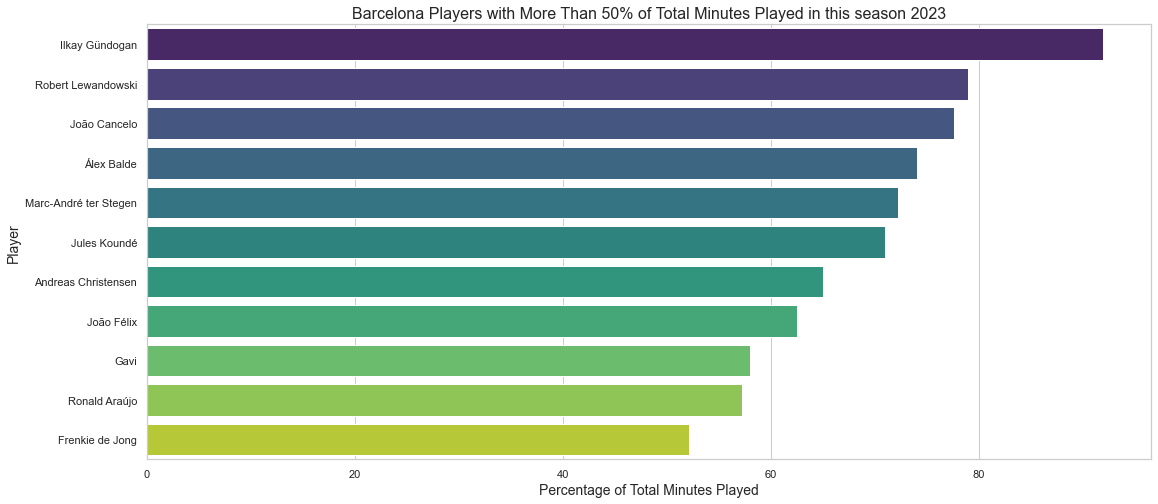

In [9]:
# Sort the DataFrame by minutes played in descending order
df_players_sorted_2023 = df_players_data_2023.sort_values(by='time', ascending=False)

# Calculate the percentage of total available minutes for each player
total_minutes_available_2023 = 90 * 18  # Assuming 90 minutes per game and 18 games this season
df_players_sorted_2023['percentage_played'] = (df_players_sorted_2023['time'] / total_minutes_available_2023) * 100

# Filter out players who played less than 50% of the season
df_players_filtered_2023 = df_players_sorted_2023[df_players_sorted_2023['percentage_played'] > 50]

# Set seaborn style for improved aesthetics
sns.set(style="whitegrid")

plt.figure(figsize=(18, 8))

# Use a barplot for better aesthetics and automatic color variations
sns.barplot(x='percentage_played', y='player_name', data=df_players_filtered_2023, palette="viridis")

plt.title('Barcelona Players with More Than 50% of Total Minutes Played in this season 2023', fontsize=16)
plt.xlabel('Percentage of Total Minutes Played', fontsize=14)
plt.ylabel('Player', fontsize=14)

plt.show()

C:\Users\Abdo\AppData\Local\Temp\ipykernel_10588\2902202580.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='percentage_played', y='player_name', data=df_players_filtered_2022, palette="viridis")


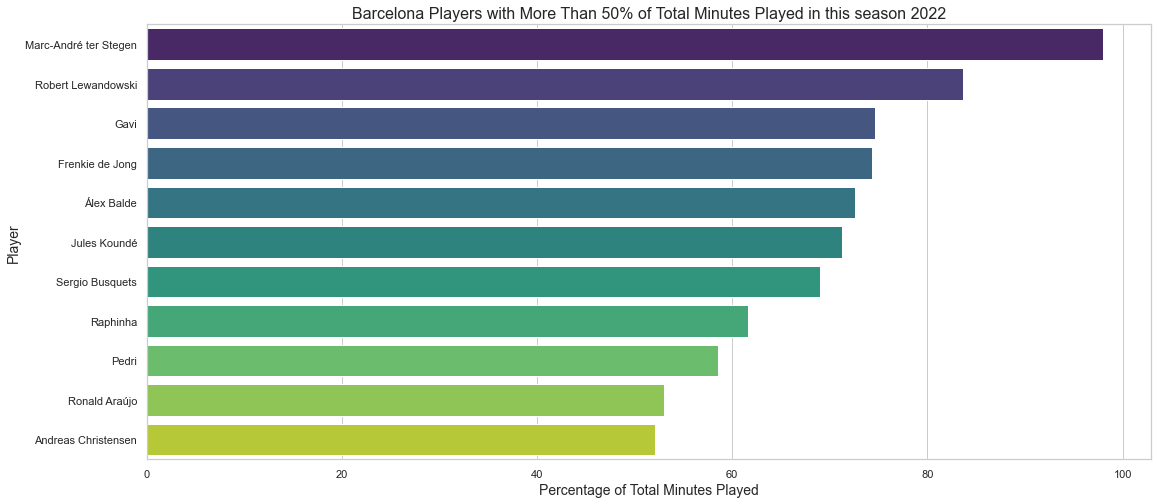

In [10]:
# Sort the DataFrame by minutes played in descending order
df_players_sorted_2022 = df_players_data_2022.sort_values(by='time', ascending=False)

# Calculate the percentage of total available minutes for each player
total_minutes_available_2022 = 90 * 38  # Assuming 90 minutes per game and 38 games last season
df_players_sorted_2022['percentage_played'] = (df_players_sorted_2022['time'] / total_minutes_available_2022) * 100

# Filter out players who played less than 50% of the season
df_players_filtered_2022 = df_players_sorted_2022[df_players_sorted_2022['percentage_played'] > 50]

# Set seaborn style for improved aesthetics
sns.set(style="whitegrid")

plt.figure(figsize=(18, 8))

# Use a barplot for better aesthetics and automatic color variations
sns.barplot(x='percentage_played', y='player_name', data=df_players_filtered_2022, palette="viridis")

plt.title('Barcelona Players with More Than 50% of Total Minutes Played in this season 2022', fontsize=16)
plt.xlabel('Percentage of Total Minutes Played', fontsize=14)
plt.ylabel('Player', fontsize=14)

plt.show()

C:\Users\Abdo\AppData\Local\Temp\ipykernel_10588\953951370.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='percentage_played', y='player_name', data=df_players_filtered_2022, palette="viridis", ax=axes[0])
C:\Users\Abdo\AppData\Local\Temp\ipykernel_10588\953951370.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='percentage_played', y='player_name', data=df_players_filtered_2023, palette="viridis", ax=axes[1])


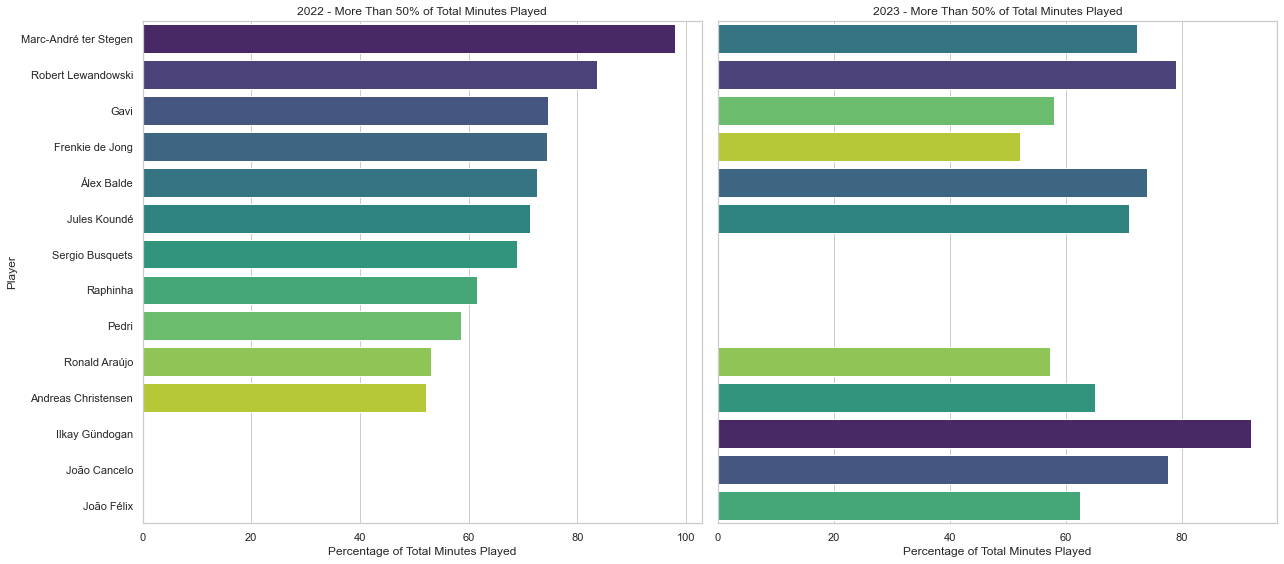

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for improved aesthetics
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8), sharey=True)

# Plot for 2022
df_players_sorted_2022 = df_players_data_2022.sort_values(by='time', ascending=False)
total_minutes_available_2022 = 90 * 38
df_players_sorted_2022['percentage_played'] = (df_players_sorted_2022['time'] / total_minutes_available_2022) * 100
df_players_filtered_2022 = df_players_sorted_2022[df_players_sorted_2022['percentage_played'] > 50]

sns.barplot(x='percentage_played', y='player_name', data=df_players_filtered_2022, palette="viridis", ax=axes[0])
axes[0].set_title('2022 - More Than 50% of Total Minutes Played')
axes[0].set_xlabel('Percentage of Total Minutes Played')
axes[0].set_ylabel('Player')

# Plot for 2023
df_players_sorted_2023 = df_players_data_2023.sort_values(by='time', ascending=False)
total_minutes_available_2023 = 90 * 18
df_players_sorted_2023['percentage_played'] = (df_players_sorted_2023['time'] / total_minutes_available_2023) * 100
df_players_filtered_2023 = df_players_sorted_2023[df_players_sorted_2023['percentage_played'] > 50]

sns.barplot(x='percentage_played', y='player_name', data=df_players_filtered_2023, palette="viridis", ax=axes[1])
axes[1].set_title('2023 - More Than 50% of Total Minutes Played')
axes[1].set_xlabel('Percentage of Total Minutes Played')
axes[1].set_ylabel('Player')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


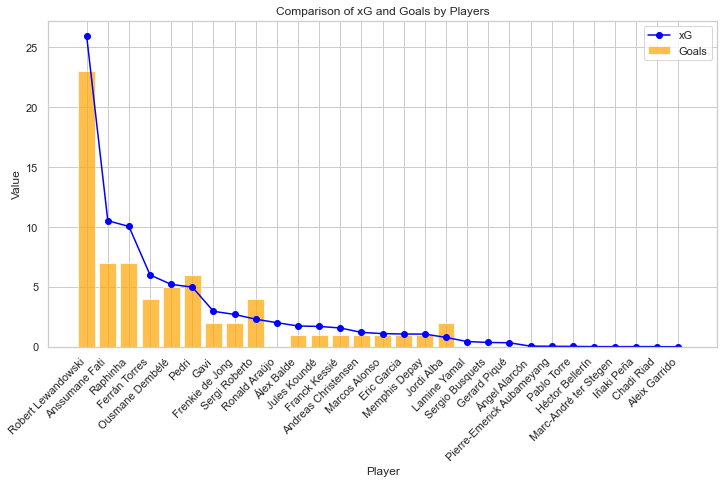

In [12]:
# Sort the DataFrame by xG in descending order
df_players_sorted_2022 = df_players_data_2022.sort_values(by='xG', ascending=False)

players_2022 = df_players_sorted_2022['player_name']
xG_2022 = df_players_sorted_2022['xG']
goals_2022 = df_players_sorted_2022['goals']

plt.figure(figsize=(12, 6))

# Plot xG as a line with markers
plt.plot(players_2022, xG_2022, '-o', label='xG', color='blue')

# Plot goals as bars
plt.bar(players_2022, goals_2022, alpha=0.7, label='Goals', color='orange')

plt.xticks(rotation=45, ha='right')
plt.title('Comparison of xG and Goals by Players')
plt.xlabel('Player')
plt.ylabel('Value')
plt.legend()

plt.show()

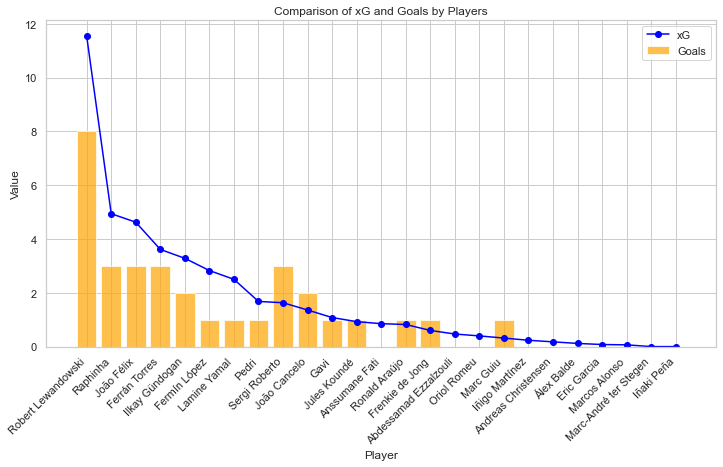

In [13]:
# Sort the DataFrame by xG in descending order
df_players_sorted_2023 = df_players_data_2023.sort_values(by='xG', ascending=False)

players_2023 = df_players_sorted_2023['player_name']
xG_2023 = df_players_sorted_2023['xG']
goals_2023 = df_players_sorted_2023['goals']

plt.figure(figsize=(12, 6))

# Plot xG as a line with markers
plt.plot(players_2023, xG_2023, '-o', label='xG', color='blue')

# Plot goals as bars
plt.bar(players_2023, goals_2023, alpha=0.7, label='Goals', color='orange')

plt.xticks(rotation=45, ha='right')
plt.title('Comparison of xG and Goals by Players')
plt.xlabel('Player')
plt.ylabel('Value')
plt.legend()

plt.show()

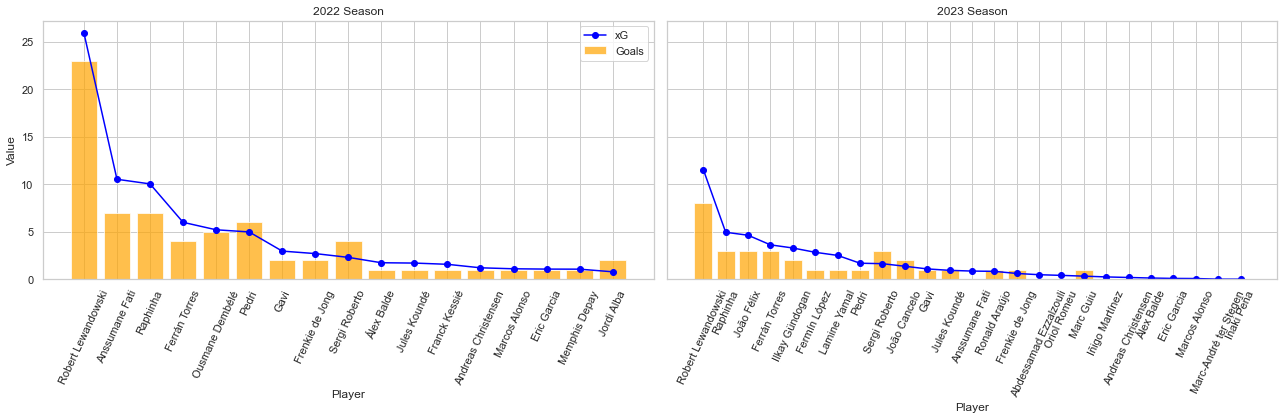

In [14]:
# Sort the DataFrame by xG in descending order for 2022
df_players_sorted_2022 = df_players_data_2022.sort_values(by='xG', ascending=False)

# Drop players with 0 goals
df_players_sorted_2022 = df_players_sorted_2022[df_players_sorted_2022['goals'] > 0]

players_2022 = df_players_sorted_2022['player_name']
xG_2022 = df_players_sorted_2022['xG']
goals_2022 = df_players_sorted_2022['goals']

players_2023 = df_players_sorted_2023['player_name']
xG_2023 = df_players_sorted_2023['xG']
goals_2023 = df_players_sorted_2023['goals']

# Calculate total goals and xG for 2022
total_goals_2022 = goals_2022.sum()
total_xG_2022 = xG_2022.sum()

# Calculate total goals and xG for 2023
total_goals_2023 = goals_2023.sum()
total_xG_2023 = xG_2023.sum()

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6), sharey=True)

# Plot for 2022
axes[0].bar(players_2022, goals_2022, alpha=0.7, label='Goals', color='orange')
axes[0].plot(players_2022, xG_2022, '-o', label='xG', color='blue')
#axes[0].bar(['Total'], [total_goals_2022], alpha=0.7, label='Total Goals', color='purple')
#axes[0].bar(['Total'], [total_xG_2022], alpha=0.7, label='Total xG', color='green')
axes[0].set_title('2022 Season')
axes[0].set_xlabel('Player')
axes[0].set_ylabel('Value')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=65)

# Plot for 2023
axes[1].bar(players_2023, goals_2023, alpha=0.7, label='Goals', color='orange')
axes[1].plot(players_2023, xG_2023, '-o', label='xG', color='blue')
#axes[1].bar(['Total'], [total_goals_2023], alpha=0.7, label='Total Goals', color='purple')
#axes[1].bar(['Total'], [total_xG_2023], alpha=0.7, label='Total xG', color='green')
axes[1].set_title('2023 Season')
axes[1].set_xlabel('Player')
axes[1].tick_params(axis='x', rotation=65)

# Show the plots
plt.tight_layout()
plt.show()

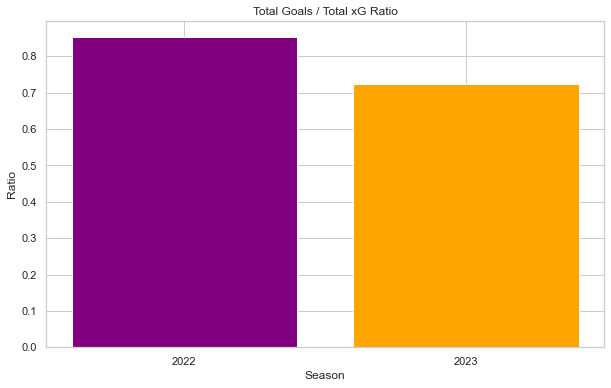

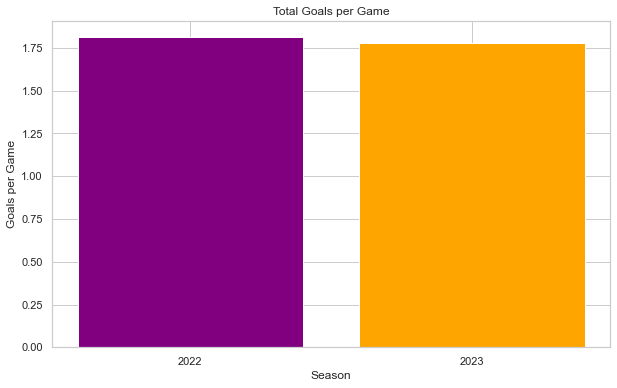

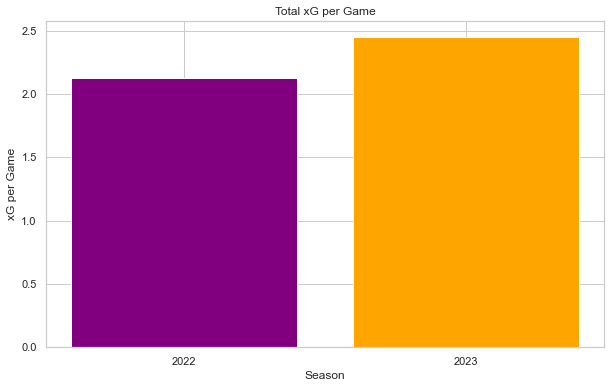

In [15]:
# Calculate the indicators
goals_xG_ratio_2022 = total_goals_2022 / total_xG_2022
goals_per_game_2022 = total_goals_2022 / 38  # Assuming 38 games
xG_per_game_2022 = total_xG_2022 / 38

goals_xG_ratio_2023 = total_goals_2023 / total_xG_2023
goals_per_game_2023 = total_goals_2023 / 18  # Assuming 18 games
xG_per_game_2023 = total_xG_2023 / 18

# Plot Total Goals / Total xG Ratio for 2022 and 2023
plt.figure(figsize=(10, 6))
plt.bar(['2022', '2023'], [goals_xG_ratio_2022, goals_xG_ratio_2023], color=['purple', 'orange'])
plt.title('Total Goals / Total xG Ratio')
plt.xlabel('Season')
plt.ylabel('Ratio')
plt.show()

# Plot Total Goals per Game for 2022 and 2023
plt.figure(figsize=(10, 6))
plt.bar(['2022', '2023'], [goals_per_game_2022, goals_per_game_2023], color=['purple', 'orange'])
plt.title('Total Goals per Game')
plt.xlabel('Season')
plt.ylabel('Goals per Game')
plt.show()

# Plot Total xG per Game for 2022 and 2023
plt.figure(figsize=(10, 6))
plt.bar(['2022', '2023'], [xG_per_game_2022, xG_per_game_2023], color=['purple', 'orange'])
plt.title('Total xG per Game')
plt.xlabel('Season')
plt.ylabel('xG per Game')
plt.show()


In [16]:
# Create a new column 'goals_against_barcelona' by summing 'goals_h' when Barcelona is away and 'goals_a' when Barcelona is home
df_games_data_2022['goals_against_barcelona'] = df_games_data_2022.apply(
    lambda row: row['goals_h'] if row['team_a'] == 'Barcelona' else row['goals_a'],
    axis=1)
total_goals_againt_barcelone_2022 = df_games_data_2022['goals_against_barcelona'].sum()

In [17]:
# Create a new column 'goals_against_barcelona' by summing 'goals_h' when Barcelona is away and 'goals_a' when Barcelona is home
df_games_data_2023['goals_against_barcelona'] = df_games_data_2023.apply(
    lambda row: row['goals_h'] if row['team_a'] == 'Barcelona' else row['goals_a'],
    axis=1)
total_goals_againt_barcelone_2023 = df_games_data_2023['goals_against_barcelona'].sum()

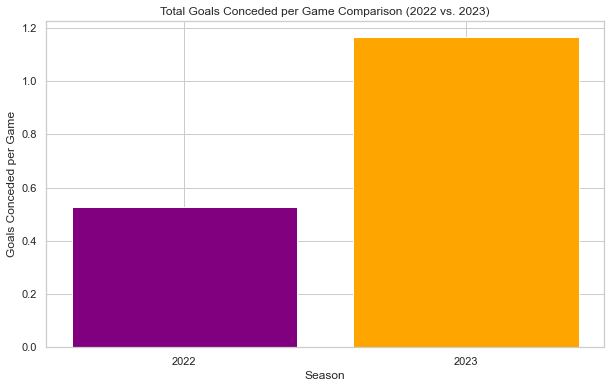

In [18]:
goals_canceded_per_game_2022 = total_goals_againt_barcelone_2022 / 38
goals_canceded_per_game_2023 = total_goals_againt_barcelone_2023 / 18


# Plot Total Goals / Total xG Ratio for 2022 and 2023
plt.figure(figsize=(10, 6))
plt.bar(['2022', '2023'], [goals_canceded_per_game_2022, goals_canceded_per_game_2023], color=['purple', 'orange'])
plt.title('Total Goals Conceded per Game Comparison (2022 vs. 2023)')
plt.xlabel('Season')
plt.ylabel('Goals Conceded per Game')
plt.show()

In [19]:
# Create a new column 'goals_against_barcelona' by summing 'goals_h' when Barcelona is away and 'goals_a' when Barcelona is home
df_games_data_2022['xG_against_barcelona'] = df_games_data_2022.apply(
    lambda row: row['xG_h'] if row['team_a'] == 'Barcelona' else row['xG_a'],
    axis=1)
total_xG_againt_barcelone_2022 = df_games_data_2022['xG_against_barcelona'].sum()
total_xG_againt_barcelone_2022

33.339881000000005

In [20]:
# Create a new column 'goals_against_barcelona' by summing 'goals_h' when Barcelona is away and 'goals_a' when Barcelona is home
df_games_data_2023['xG_against_barcelona'] = df_games_data_2023.apply(
    lambda row: row['xG_h'] if row['team_a'] == 'Barcelona' else row['xG_a'],
    axis=1)
total_xG_againt_barcelone_2023 = df_games_data_2023['xG_against_barcelona'].sum()
total_xG_againt_barcelone_2023

21.151409

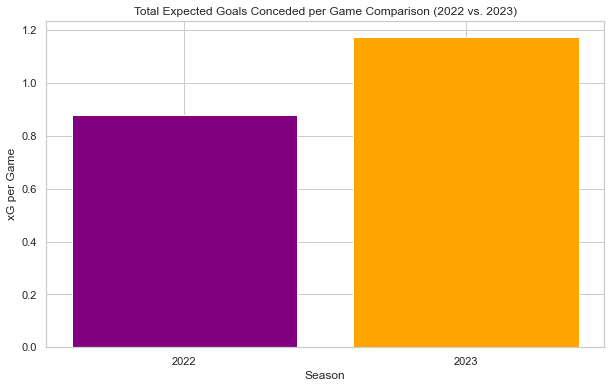

In [21]:
xG_canceded_per_game_2022 = total_xG_againt_barcelone_2022 / 38
xG_canceded_per_game_2023 = total_xG_againt_barcelone_2023 / 18


# Plot Total Goals / Total xG Ratio for 2022 and 2023
plt.figure(figsize=(10, 6))
plt.bar(['2022', '2023'], [xG_canceded_per_game_2022, xG_canceded_per_game_2023], color=['purple', 'orange'])
plt.title('Total Expected Goals Conceded per Game Comparison (2022 vs. 2023)')
plt.xlabel('Season')
plt.ylabel('xG per Game')
plt.show()

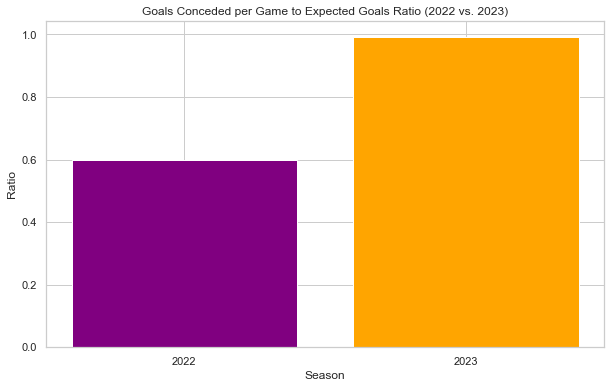

In [22]:
# Calculate the indicators
goals_xG_ratio_against_2022 = total_goals_againt_barcelone_2022 / total_xG_againt_barcelone_2022
goals_xG_ratio_against_2023 = total_goals_againt_barcelone_2023 / total_xG_againt_barcelone_2023
# Plot Total Goals / Total xG Ratio for 2022 and 2023
plt.figure(figsize=(10, 6))
plt.bar(['2022', '2023'], [goals_xG_ratio_against_2022, goals_xG_ratio_against_2023], color=['purple', 'orange'])
plt.title('Goals Conceded per Game to Expected Goals Ratio (2022 vs. 2023)')
plt.xlabel('Season')
plt.ylabel('Ratio')
plt.show()

# Chat of the games this season and last season


C:\Users\Abdo\AppData\Local\Temp\ipykernel_10588\2360607807.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games_data_2022_home['result_value'] = df_games_data_2022_home['result'].map(result_mapping)


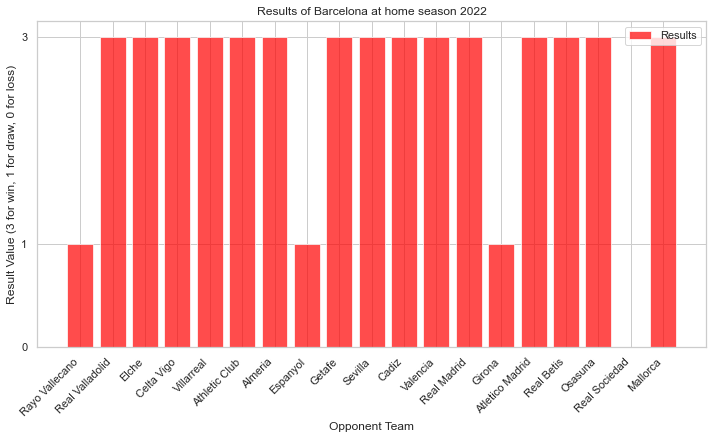

In [23]:
# the games of Barcelona at home
df_games_data_2022.head()
df_games_data_2022_home = df_games_data_2022[df_games_data_2022['team_h'] == 'Barcelona']
df_games_data_2022_home.head()

# Map results to corresponding values (3 for win, 1 for draw, 0 for loss)
result_mapping = {'w': 3, 'd': 1, 'l': 0}
df_games_data_2022_home['result_value'] = df_games_data_2022_home['result'].map(result_mapping)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(df_games_data_2022_home['team_a'], df_games_data_2022_home['result_value'], alpha=0.7, label='Results', color='red')

# Set the y-axis ticks
plt.yticks([0, 1, 3]) 

plt.xticks(rotation=45, ha='right')
plt.title('Results of Barcelona at home season 2022')
plt.xlabel('Opponent Team')
plt.ylabel('Result Value (3 for win, 1 for draw, 0 for loss)')
plt.legend()

plt.show()


C:\Users\Abdo\AppData\Local\Temp\ipykernel_10588\1792672717.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games_data_2022_away['result_value'] = df_games_data_2022_away['result'].map(result_mapping)


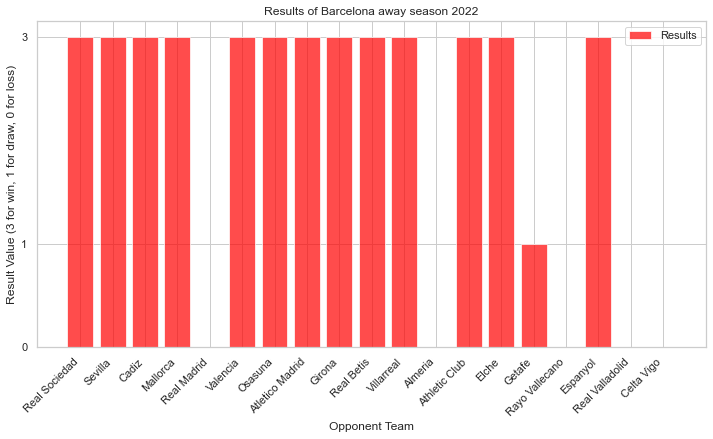

In [24]:
# the games of Barcelona at home
df_games_data_2022.head()
df_games_data_2022_away = df_games_data_2022[df_games_data_2022['team_a'] == 'Barcelona']
df_games_data_2022_away.head()

# Map results to corresponding values (3 for win, 1 for draw, 0 for loss)
result_mapping = {'w': 3, 'd': 1, 'l': 0}
df_games_data_2022_away['result_value'] = df_games_data_2022_away['result'].map(result_mapping)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(df_games_data_2022_away['team_h'], df_games_data_2022_away['result_value'], alpha=0.7, label='Results', color='red')

# Set the y-axis ticks
plt.yticks([0, 1, 3]) 

plt.xticks(rotation=45, ha='right')
plt.title('Results of Barcelona away season 2022')
plt.xlabel('Opponent Team')
plt.ylabel('Result Value (3 for win, 1 for draw, 0 for loss)')
plt.legend()

plt.show()


C:\Users\Abdo\AppData\Local\Temp\ipykernel_10588\1025471866.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games_data_2023_home['result_value'] = df_games_data_2023_home['result'].map(result_mapping)


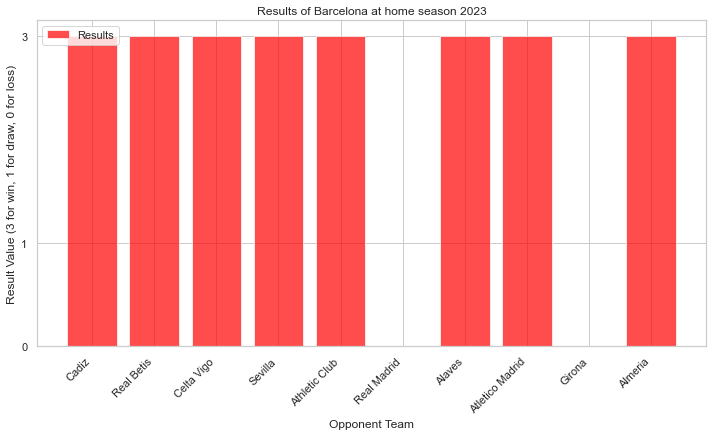

In [25]:
# the games of Barcelona at home
df_games_data_2023_home = df_games_data_2023[df_games_data_2023['team_h'] == 'Barcelona']
df_games_data_2023_home.head()

# Map results to corresponding values (3 for win, 1 for draw, 0 for loss)
result_mapping = {'w': 3, 'd': 1, 'l': 0}
df_games_data_2023_home['result_value'] = df_games_data_2023_home['result'].map(result_mapping)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(df_games_data_2023_home['team_a'], df_games_data_2023_home['result_value'], alpha=0.7, label='Results', color='red')

# Set the y-axis ticks
plt.yticks([0, 1, 3]) 

plt.xticks(rotation=45, ha='right')
plt.title('Results of Barcelona at home season 2023')
plt.xlabel('Opponent Team')
plt.ylabel('Result Value (3 for win, 1 for draw, 0 for loss)')
plt.legend()

plt.show()

C:\Users\Abdo\AppData\Local\Temp\ipykernel_10588\3188351584.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games_data_2023_away['result_value'] = df_games_data_2023_away['result'].map(result_mapping)


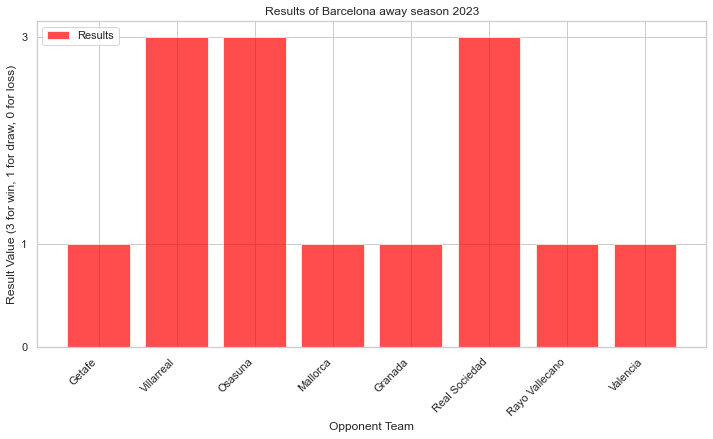

In [26]:
# the games of Barcelona at home
df_games_data_2023_away = df_games_data_2023[df_games_data_2023['team_a'] == 'Barcelona']

# Map results to corresponding values (3 for win, 1 for draw, 0 for loss)
result_mapping = {'w': 3, 'd': 1, 'l': 0}
df_games_data_2023_away['result_value'] = df_games_data_2023_away['result'].map(result_mapping)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(df_games_data_2023_away['team_h'],df_games_data_2023_away['result_value'], alpha=0.7, label='Results', color='red')

# Set the y-axis ticks
plt.yticks([0, 1, 3]) 

plt.xticks(rotation=45, ha='right')
plt.title('Results of Barcelona away season 2023')
plt.xlabel('Opponent Team')
plt.ylabel('Result Value (3 for win, 1 for draw, 0 for loss)')
plt.legend()

plt.show()


# Let's focus on Robert Lewandowski and the arrival of Vitor Roque

In [27]:
robert_lewandowski_data_2022 = df_players_data_2022[df_players_data_2022['player_name'] == 'Robert Lewandowski']
robert_lewandowski_data_2023 = df_players_data_2023[df_players_data_2022['player_name'] == 'Robert Lewandowski']

C:\Users\Abdo\AppData\Local\Temp\ipykernel_10588\210015527.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  robert_lewandowski_data_2023 = df_players_data_2023[df_players_data_2022['player_name'] == 'Robert Lewandowski']


In [28]:
robert_lewandowski_data_2022

,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup
0,227,Robert Lewandowski,34,2862,23,25.939281,7,6.353777,135,36,2,1,F S,Barcelona,23,25.196005009114742,36.746243976056576,9.871428990736604


In [29]:
robert_lewandowski_data_2023

,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup
0,227,Robert Lewandowski,16,1279,8,11.552874,4,2.70955,56,16,3,0,F S,Barcelona,6,10.066319204866886,16.715312037616968,5.546186218038201


C:\Users\Abdo\AppData\Local\Temp\ipykernel_10588\2875399107.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  robert_lewandowski_data_2022['time'] = pd.to_numeric(robert_lewandowski_data_2022['time'], errors='coerce').fillna(0)
C:\Users\Abdo\AppData\Local\Temp\ipykernel_10588\2875399107.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  robert_lewandowski_data_2022['goals_per_90_minute'] = float(robert_lewandowski_data_2022['goals']) / float(robert_lewandowski_data_2022['time']) * 90
C:\Users\Abdo\AppData\Local\Temp\ipykernel_10588\2875399107.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

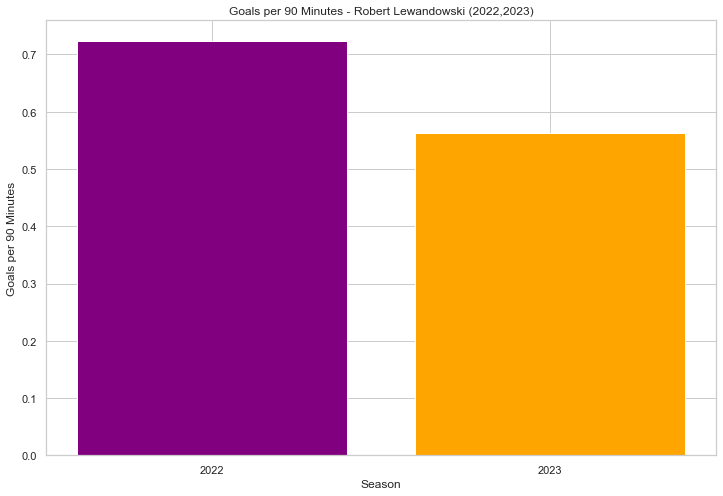

In [30]:
# Convert 'time' to numeric, coerce errors to NaN, and fill NaN with 0
robert_lewandowski_data_2022['time'] = pd.to_numeric(robert_lewandowski_data_2022['time'], errors='coerce').fillna(0)

# Calculate goals per 90 minutes for 2022 and 2023
robert_lewandowski_data_2022['goals_per_90_minute'] = float(robert_lewandowski_data_2022['goals']) / float(robert_lewandowski_data_2022['time']) * 90
robert_lewandowski_data_2023['goals_per_90_minute'] = float(robert_lewandowski_data_2023['goals']) / float(robert_lewandowski_data_2023['time']) * 90

# Plotting goals per 90 minutes for 2022 and 2023
plt.figure(figsize=(12, 8))

# Goals per 90 minutes

plt.bar(['2022', '2023'], [robert_lewandowski_data_2022['goals_per_90_minute'][0], robert_lewandowski_data_2023['goals_per_90_minute'][0]], color=['purple', 'orange'])
plt.title('Goals per 90 Minutes - Robert Lewandowski (2022,2023)')
plt.xlabel('Season')
plt.ylabel('Goals per 90 Minutes')

plt.show()

C:\Users\Abdo\AppData\Local\Temp\ipykernel_10588\362585013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  robert_lewandowski_data_2022['time'] = pd.to_numeric(robert_lewandowski_data_2022['time'], errors='coerce').fillna(0)
C:\Users\Abdo\AppData\Local\Temp\ipykernel_10588\362585013.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  robert_lewandowski_data_2022['xG_per_90_minute'] = float(robert_lewandowski_data_2022['xG']) / float(robert_lewandowski_data_2022['time']) * 90
C:\Users\Abdo\AppData\Local\Temp\ipykernel_10588\362585013.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

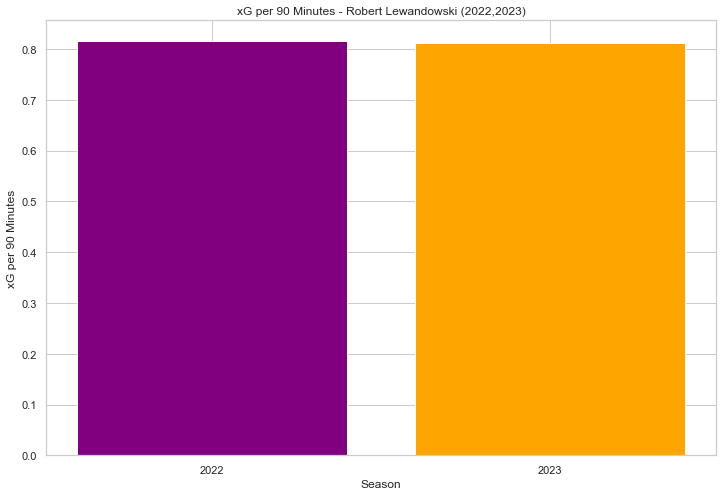

In [31]:
# Convert 'time' to numeric, coerce errors to NaN, and fill NaN with 0
robert_lewandowski_data_2022['time'] = pd.to_numeric(robert_lewandowski_data_2022['time'], errors='coerce').fillna(0)

# Calculate goals per 90 minutes for 2022 and 2023
robert_lewandowski_data_2022['xG_per_90_minute'] = float(robert_lewandowski_data_2022['xG']) / float(robert_lewandowski_data_2022['time']) * 90
robert_lewandowski_data_2023['xG_per_90_minute'] = float(robert_lewandowski_data_2023['xG']) / float(robert_lewandowski_data_2023['time']) * 90

# Plotting goals per 90 minutes for 2022 and 2023
plt.figure(figsize=(12, 8))

# Goals per 90 minutes

plt.bar(['2022', '2023'], [robert_lewandowski_data_2022['xG_per_90_minute'][0], robert_lewandowski_data_2023['xG_per_90_minute'][0]], color=['purple', 'orange'])
plt.title('xG per 90 Minutes - Robert Lewandowski (2022,2023)')
plt.xlabel('Season')
plt.ylabel('xG per 90 Minutes')

plt.show()

C:\Users\Abdo\AppData\Local\Temp\ipykernel_10588\4149535400.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  robert_lewandowski_data_2022['npxG_per_90_minute'] = float(robert_lewandowski_data_2022['npxG']) / float(robert_lewandowski_data_2022['time']) * 90
C:\Users\Abdo\AppData\Local\Temp\ipykernel_10588\4149535400.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  robert_lewandowski_data_2022['npxG_per_90_minute'] = float(robert_lewandowski_data_2022['npxG']) / float(robert_lewandowski_data_2022['time']) * 90
C:\Users\Abdo\AppData\Local\Temp\ipykernel_10588\4149535400.py:3: FutureWarning: Calling float on a single element Series is deprecated a

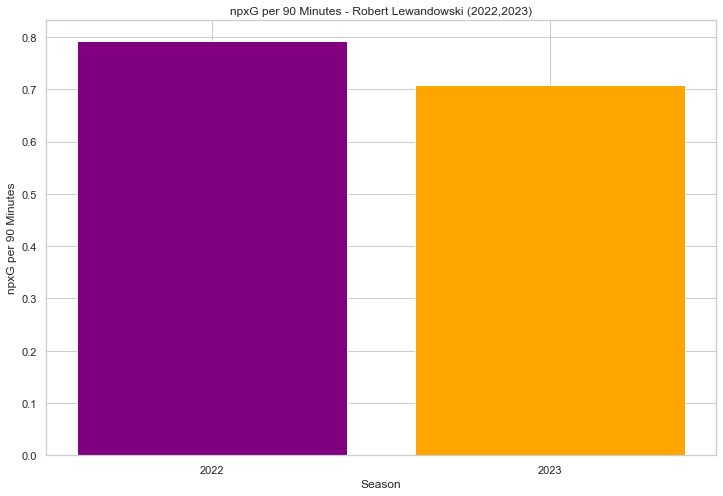

In [32]:
# Calculate goals per 90 minutes for 2022 and 2023
robert_lewandowski_data_2022['npxG_per_90_minute'] = float(robert_lewandowski_data_2022['npxG']) / float(robert_lewandowski_data_2022['time']) * 90
robert_lewandowski_data_2023['npxG_per_90_minute'] = float(robert_lewandowski_data_2023['npxG']) / float(robert_lewandowski_data_2023['time']) * 90

# Plotting goals per 90 minutes for 2022 and 2023
plt.figure(figsize=(12, 8))

# Goals per 90 minutes

plt.bar(['2022', '2023'], [robert_lewandowski_data_2022['npxG_per_90_minute'][0], robert_lewandowski_data_2023['npxG_per_90_minute'][0]], color=['purple', 'orange'])
plt.title('npxG per 90 Minutes - Robert Lewandowski (2022,2023)')
plt.xlabel('Season')
plt.ylabel('npxG per 90 Minutes')

plt.show()

# Vitor Roque Arrival

In [62]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Replace the URL with the actual URL of the page you want to scrape
url = 'https://fbref.com/fr/joueurs/cb00f1e6/Vitor-Roque'  # Replace with the actual URL

# Send an HTTP request to the URL
response = requests.get(url)


# Parse the HTML content of the page
soup = BeautifulSoup(response.text, 'html.parser')


section_element = soup.find('p', string='Libertadores')
statistics1 = section_element.find_next('div', class_='p1')
statistics2 = section_element.find_next('div', class_='p2')

In [63]:
import pandas as pd

# Assuming you have some data, you can create a DataFrame like this
value_element_MJ = statistics1.find('span', string='MJ')
value_element_Min = statistics1.find('span', string='Min')
value_element_Buts = statistics1.find('span', string='Buts')
value_element_PD = statistics1.find('span', string='PD')
value_element_xG = statistics2.find('span', string='xG')
value_element_npxG = statistics2.find('span', string='npxG')
value_element_xAG = statistics2.find('span', string='xAG')

data = {'2023': ["Série A"],
        'MJ': [value_element_MJ.find_next('p').get_text() if value_element_MJ and value_element_MJ.find_next('p') else None],
        'Min': [value_element_Min.find_next('p').get_text() if value_element_Min and value_element_Min.find_next('p') else None],
        'Buts': [value_element_Buts.find_next('p').get_text() if value_element_Buts and value_element_Buts.find_next('p') else None],
        'PD': [value_element_PD.find_next('p').get_text() if value_element_PD and value_element_PD.find_next('p') else None],
        'xG': [value_element_xG.find_next('p').get_text() if value_element_xG and value_element_xG.find_next('p') else None],
        'npxG': [value_element_npxG.find_next('p').get_text() if value_element_npxG and value_element_npxG.find_next('p') else None],
        'xAG': [value_element_xAG.find_next('p').get_text() if value_element_xAG and value_element_xAG.find_next('p') else None],
       }

serie_a_df = pd.DataFrame(data)
print(serie_a_df)


      2023  MJ   Min Buts PD   xG npxG  xAG
0  Série A  25  1714   12  3  8.8  8.8  1.2


In [64]:
# Assuming you have some data, you can create a DataFrame like this
value_element_MJ = statistics1.find('span', string='MJ')
value_element_Min = statistics1.find('span', string='Min')
value_element_Buts = statistics1.find('span', string='Buts')
value_element_PD = statistics1.find('span', string='PD')
value_element_xG = statistics2.find('span', string='xG')
value_element_npxG = statistics2.find('span', string='npxG')
value_element_xAG = statistics2.find('span', string='xAG')

data_Libertadores = {'2023': ["Libertadores"],
                     'MJ': [[p.get_text() for p in value_element_MJ.find_all_next('p')[:2]][1] if value_element_MJ else None],
                     'Min': [[p.get_text() for p in value_element_Min.find_all_next('p')[:2]][1] if value_element_Min else None],
                     'Buts': [[p.get_text() for p in value_element_Buts.find_all_next('p')[:2]][1] if value_element_Buts else None],
                     'PD': [[p.get_text() for p in value_element_PD.find_all_next('p')[:2]][1] if value_element_PD else None],
                     'xG': [[p.get_text() for p in value_element_xG.find_all_next('p')[:2]][1] if value_element_xG else None],
                     'npxG': [[p.get_text() for p in value_element_npxG.find_all_next('p')[:2]][1] if value_element_npxG else None],
                     'xAG': [[p.get_text() for p in value_element_xAG.find_all_next('p')[:2]][1] if value_element_xAG else None],
                    }

Libertadores_df = pd.DataFrame(data_Libertadores)
print(Libertadores_df)


           2023 MJ  Min Buts PD   xG npxG  xAG
0  Libertadores  8  636    4  1  2.3  2.3  0.5


In [65]:
# Concatenate the two DataFrames vertically
VitorRoque_df = pd.concat([serie_a_df, Libertadores_df], ignore_index=True)


# Print the combined DataFrame
print(VitorRoque_df)


           2023  MJ   Min Buts PD   xG npxG  xAG
0       Série A  25  1714   12  3  8.8  8.8  1.2
1  Libertadores   8   636    4  1  2.3  2.3  0.5


# Goal Efficiency Showdown: Lewandowski vs. Vitor Roque

In [66]:
# Convert 'Min' and 'Buts' columns to numeric value
VitorRoque_df['MJ'] = pd.to_numeric(VitorRoque_df['MJ'])
VitorRoque_df['Min'] = pd.to_numeric(VitorRoque_df['Min'])
VitorRoque_df['Buts'] = pd.to_numeric(VitorRoque_df['Buts'])
VitorRoque_df['PD'] = pd.to_numeric(VitorRoque_df['PD'])
VitorRoque_df['xG'] = pd.to_numeric(VitorRoque_df['xG'])
VitorRoque_df['npxG'] = pd.to_numeric(VitorRoque_df['npxG'])
VitorRoque_df['xAG'] = pd.to_numeric(VitorRoque_df['xAG'])

In [67]:
# Add a row for the total
numeric_columns = VitorRoque_df.columns[VitorRoque_df.dtypes != object]
VitorRoque_df.loc['Total'] = VitorRoque_df[numeric_columns].sum()
VitorRoque_df.at['Total', '2023'] = 'Total'
print(VitorRoque_df)

               2023    MJ     Min  Buts   PD    xG  npxG  xAG
0           Série A  25.0  1714.0  12.0  3.0   8.8   8.8  1.2
1      Libertadores   8.0   636.0   4.0  1.0   2.3   2.3  0.5
Total         Total  33.0  2350.0  16.0  4.0  11.1  11.1  1.7


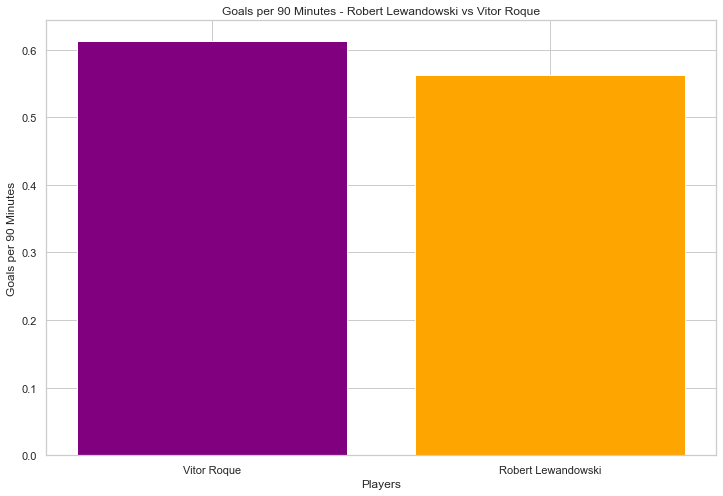

In [83]:
VitorRoque_df['goals_per_90_minute'] = (VitorRoque_df.loc['Total', 'Buts'] / VitorRoque_df.loc['Total','Min']) * 90

# Plotting goals per 90 minutes for 2022 and 2023
plt.figure(figsize=(12, 8))

# Goals per 90 minutes

plt.bar(['Vitor Roque', 'Robert Lewandowski'], [VitorRoque_df['goals_per_90_minute'][0], robert_lewandowski_data_2023['goals_per_90_minute'][0]], color=['purple', 'orange'])
plt.title('Goals per 90 Minutes - Robert Lewandowski vs Vitor Roque')
plt.xlabel('Players')
plt.ylabel('Goals per 90 Minutes')

plt.show()

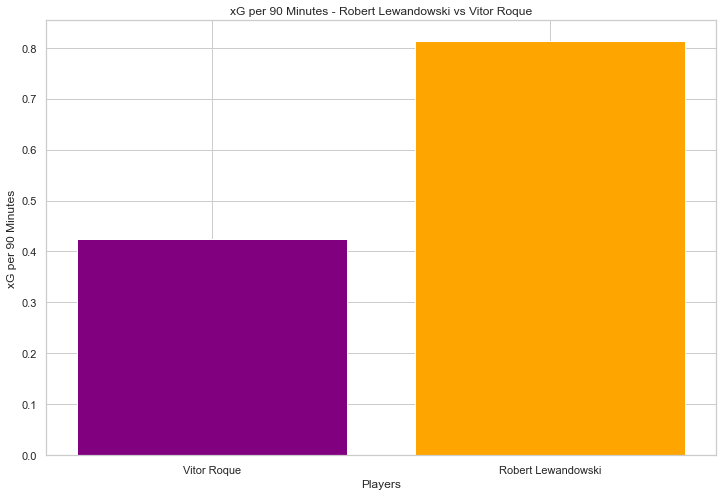

In [90]:
VitorRoque_df['xG_per_90_minute'] = (VitorRoque_df.loc['Total', 'xG'] / VitorRoque_df.loc['Total','Min']) * 90

# Plotting goals per 90 minutes for 2022 and 2023
plt.figure(figsize=(12, 8))

# Goals per 90 minutes

plt.bar(['Vitor Roque', 'Robert Lewandowski'], [VitorRoque_df['xG_per_90_minute'][0], robert_lewandowski_data_2023['xG_per_90_minute'][0]], color=['purple', 'orange'])
plt.title('xG per 90 Minutes - Robert Lewandowski vs Vitor Roque')
plt.xlabel('Players')
plt.ylabel('xG per 90 Minutes')

plt.show()

C:\Users\Abdo\AppData\Local\Temp\ipykernel_10588\3254700456.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  robert_lewandowski_data_2023['goals_to_xG_ratio'] = robert_lewandowski_data_2023['goals_per_90_minute'] / robert_lewandowski_data_2023['npxG_per_90_minute']


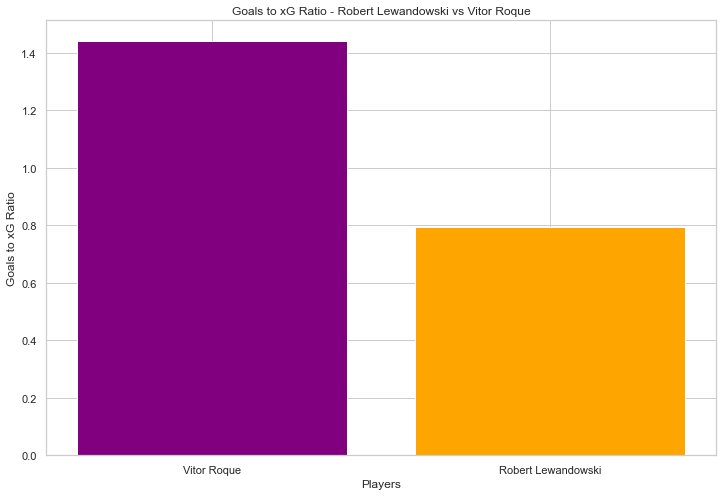

In [87]:
# Calculate the ratio of goals to xG for Vitor Roque
VitorRoque_df['goals_to_xG_ratio'] = VitorRoque_df.loc['Total', 'Buts'] / VitorRoque_df.loc['Total', 'xG']

# Calculate the ratio of goals to xG for Robert Lewandowski
robert_lewandowski_data_2023['goals_to_xG_ratio'] = robert_lewandowski_data_2023['goals_per_90_minute'] / robert_lewandowski_data_2023['xG_per_90_minute']

# Plotting the ratio of goals to xG for 2022 and 2023
plt.figure(figsize=(12, 8))

# Goals to xG ratio
plt.bar(['Vitor Roque', 'Robert Lewandowski'], [VitorRoque_df['goals_to_xG_ratio'][0], robert_lewandowski_data_2023['goals_to_xG_ratio'][0]], color=['purple', 'orange'])
plt.title('Goals to xG Ratio - Robert Lewandowski vs Vitor Roque')
plt.xlabel('Players')
plt.ylabel('Goals to xG Ratio')

plt.show()


C:\Users\Abdo\AppData\Local\Temp\ipykernel_10588\4027280810.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  robert_lewandowski_data_2023['npgoals_per_90_minute'] = float(robert_lewandowski_data_2023['npg']) / float(robert_lewandowski_data_2023['time']) * 90
C:\Users\Abdo\AppData\Local\Temp\ipykernel_10588\4027280810.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  robert_lewandowski_data_2023['npgoals_per_90_minute'] = float(robert_lewandowski_data_2023['npg']) / float(robert_lewandowski_data_2023['time']) * 90
C:\Users\Abdo\AppData\Local\Temp\ipykernel_10588\4027280810.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

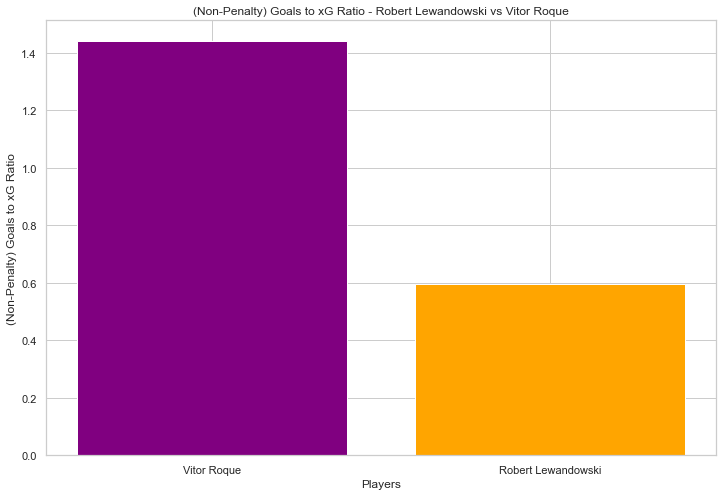

In [93]:
# Calculate the ratio of goals to xG for Vitor Roque
VitorRoque_df['goals_to_npxG_ratio'] = VitorRoque_df.loc['Total', 'Buts'] / VitorRoque_df.loc['Total', 'npxG']

# Calculate the ratio of goals to xG for Robert Lewandowski
robert_lewandowski_data_2023['npgoals_per_90_minute'] = float(robert_lewandowski_data_2023['npg']) / float(robert_lewandowski_data_2023['time']) * 90
robert_lewandowski_data_2023['goals_to_npxG_ratio'] = robert_lewandowski_data_2023['npgoals_per_90_minute'] / robert_lewandowski_data_2023['npxG_per_90_minute']

# Plotting the ratio of goals to xG for 2022 and 2023
plt.figure(figsize=(12, 8))

# Goals to xG ratio
plt.bar(['Vitor Roque', 'Robert Lewandowski'], [VitorRoque_df['goals_to_npxG_ratio'][0], robert_lewandowski_data_2023['goals_to_npxG_ratio'][0]], color=['purple', 'orange'])
plt.title('(Non-Penalty) Goals to xG Ratio - Robert Lewandowski vs Vitor Roque')
plt.xlabel('Players')
plt.ylabel('(Non-Penalty) Goals to xG Ratio')

plt.show()
